In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline 

In [2]:
train = pd.read_csv('Train_SU63ISt.csv')
test = pd.read_csv('Test_0qrQsBZ.csv')

In [3]:
train_original = train.copy()
test_original = test.copy()

In [4]:
#to check data type of features
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [7]:
#to change data type to data time format
train['Datetime'] = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format = '%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime, format = '%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime, format = '%d-%m-%Y %H:%M')

In [8]:
#to extract date year, month, day and hour from Datetime
for i in (train, test, train_original, test_original):
    i['year']= i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['Hour'] = i.Datetime.dt.hour

In [9]:
#making weekday variable to inspect effect of weekday on traffic
train['day of week'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [10]:
#assign 1-weekend, 0-weekday
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

In [11]:
temp2 = train['Datetime'].apply(applyer)
train['weekend'] = temp2

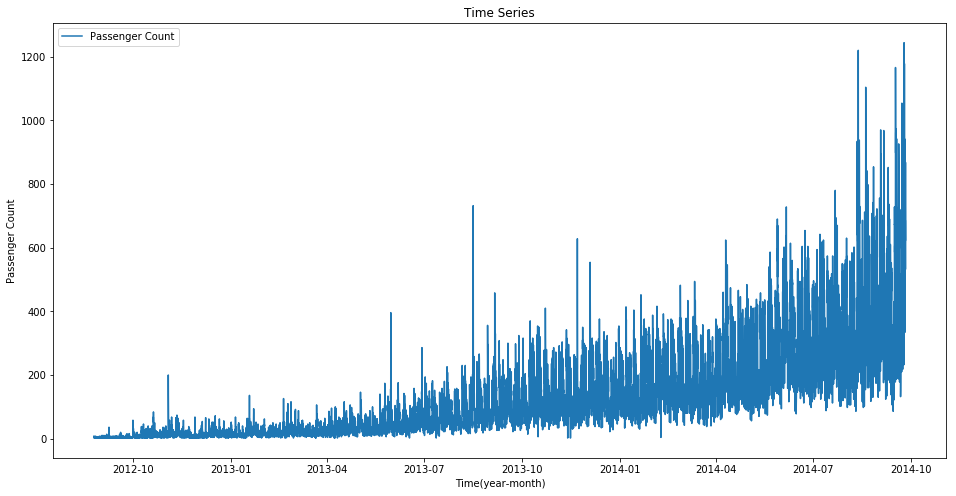

In [14]:
#visualize the time series
train.index = train['Datetime'] #index datetime to get time period on x-axis
df = train.drop('ID',axis=1) #drop ID
ts = df['Count']
plt.figure(figsize = (16,8))
plt.plot(ts, label='Passenger Count')
plt.title('Time Series')
plt.xlabel('Time(year-month)')
plt.ylabel('Passenger Count')
plt.legend(loc='best')

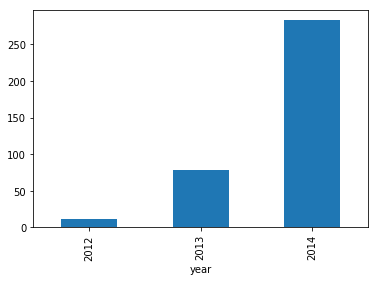

In [16]:
#hypothesis says traffic will increase with time
#assess yearly passenger count
train.groupby('year')['Count'].mean().plot.bar()

exponential growth in traffic with year

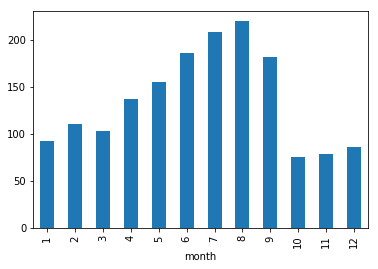

In [17]:
#hypothesis-higher traffic from May to October
train.groupby('month')['Count'].mean().plot.bar()

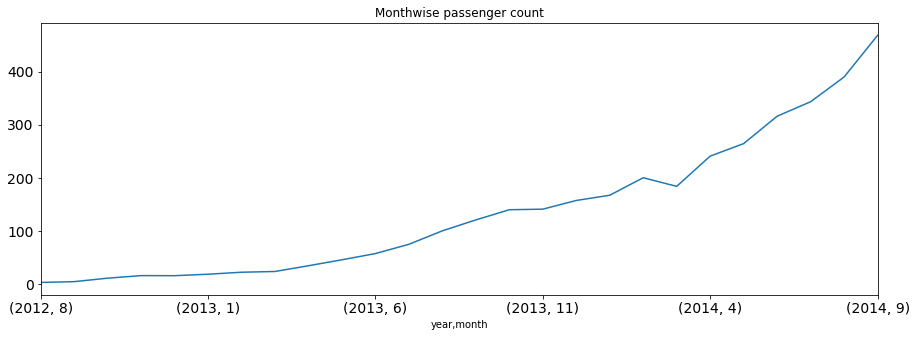

In [19]:
#to check monthly mean of each year separately
temp = train.groupby(['year', 'month'])['Count'].mean()
temp.plot(figsize = (15,5), title = 'Monthwise passenger count', fontsize = 14)

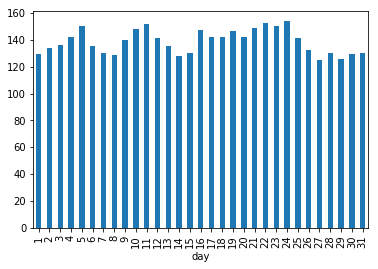

In [20]:
#daily mean of passenger count
train.groupby('day')['Count'].mean().plot.bar()

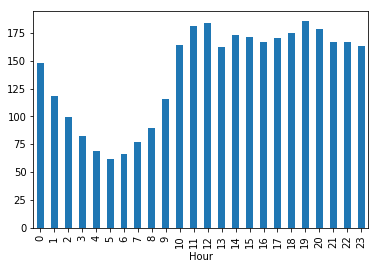

In [21]:
#hypothesis-traffic will be more during peak hours
#mean of hourly passenger count
train.groupby('Hour')['Count'].mean().plot.bar()

peak time-7pm
decreasing trend till 5am

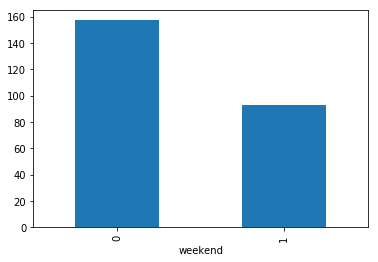

In [22]:
#hypothesis-traffic will be more on weekdays
train.groupby('weekend')['Count'].mean().plot.bar()

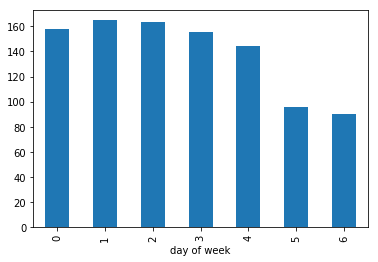

In [24]:
#day wise passenger count
train.groupby('day of week')['Count'].mean().plot.bar()
#0-Monday, 6-Sunday

In [25]:
#drop ID
train = train.drop('ID',axis=1)

In [26]:
#aggregating hourly to daily, weekly and monthly
train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H-%M')
train.index = train.Timestamp

C:\Users\Pooja Phadke\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [27]:
#hourly time series
hourly = train.resample('H').mean()

In [28]:
#converting to daily mean
daily = train.resample('D').mean()

In [29]:
#weekly
weekly = train.resample('W').mean()

In [30]:
#montly
monthly = train.resample('M').mean()

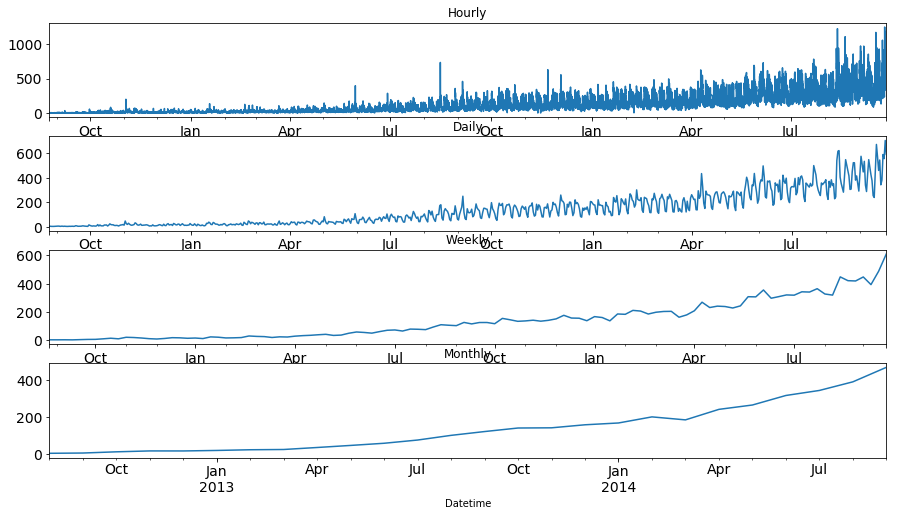

In [35]:
#visualizing hourly, daily, weekly and monthly time series
fig, axis = plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8), title = 'Hourly', fontsize=14, ax = axis[0])
daily.Count.plot(figsize = (15,8), title = 'Daily', fontsize=14, ax = axis[1])
weekly.Count.plot(figsize = (15,8), title = 'Weekly', fontsize=14, ax = axis[2])
monthly.Count.plot(figsize=(15,8), title = 'Monthly', fontsize=14, ax = axis[3])
plt.show()

In [36]:
test.Timestamp = pd.to_datetime(test.Datetime, format = '%d-%m-%Y %H-%M')
test.index = test.Timestamp

C:\Users\Pooja Phadke\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [37]:
#daily mean
test = test.resample('D').mean()

In [38]:
train.timeStamp = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H-%M')
train.index = train.Timestamp
train = train.resample('D').mean()

C:\Users\Pooja Phadke\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [39]:
train_split = train.ix['2012-08-25':'2014-06-24']
valid_split = train.ix['2014-06-25':'2014-09-25']

C:\Users\Pooja Phadke\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\Pooja Phadke\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


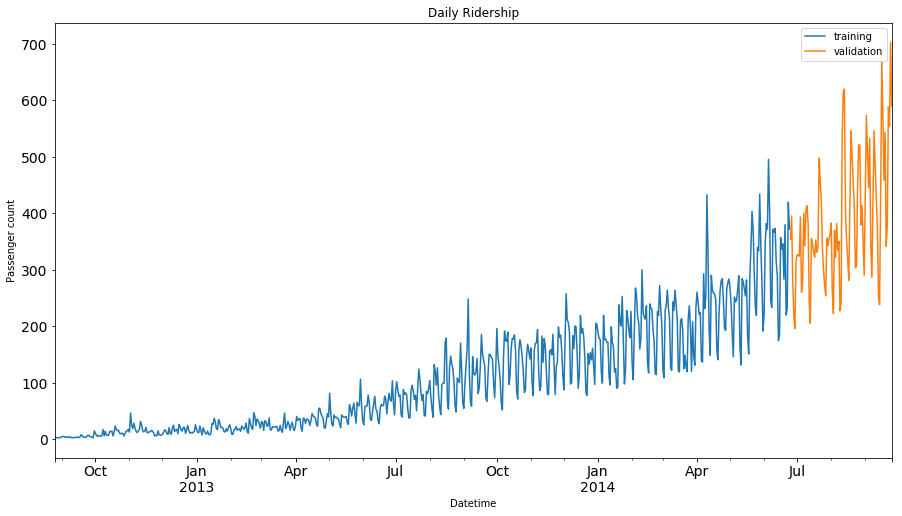

In [41]:
train_split.Count.plot(figsize=(15,8),title = 'Daily Ridership', fontsize=14, label='training')
valid_split.Count.plot(figsize = (15,8), title = 'Daily Ridership', fontsize=14, label='validation')
plt.xlabel('Datetime')
plt.ylabel('Passenger count')
plt.legend(loc='best')
plt.show()